In [6]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 30,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2,
  vertical_flip = True,
  fill_mode = 'nearest',
  validation_split = 0.2
)

train_generator = datagen.flow_from_directory(
  'project akhir/raw-img/',
  class_mode = 'categorical',
  target_size = (150,150),
  subset = 'training'
)

val_generator = datagen.flow_from_directory(
  'project akhir/raw-img/',
  class_mode = 'categorical',
  target_size = (150,150),
  subset = 'validation'
)

Found 8837 images belonging to 4 classes.
Found 2207 images belonging to 4 classes.


In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
# # Specify Model Name
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape=(150,150,3))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(4, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])  


In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = Adam(learning_rate=0.0001),
  metrics = ['accuracy']
)

In [9]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print('\nakurasi mencapai 92%')
      self.model.stop_training =True
callbacks = myCallback()

In [10]:
hist = model.fit(train_generator,
  epochs=10,
  validation_data=val_generator,
  verbose=1,
  callbacks=[callbacks])

Epoch 1/10
277/277 [==============================] - 1750s 6s/step - loss: 0.6816 - accuracy: 0.7277 - val_loss: 0.3564 - val_accuracy: 0.8709
Epoch 2/10
277/277 [==============================] - 1716s 6s/step - loss: 0.3656 - accuracy: 0.8648 - val_loss: 0.5165 - val_accuracy: 0.7993
Epoch 3/10
277/277 [==============================] - 1712s 6s/step - loss: 0.3051 - accuracy: 0.8902 - val_loss: 0.2945 - val_accuracy: 0.8922
Epoch 4/10
277/277 [==============================] - 1720s 6s/step - loss: 0.2658 - accuracy: 0.9025 - val_loss: 0.2477 - val_accuracy: 0.9162
Epoch 5/10
277/277 [==============================] - 1759s 6s/step - loss: 0.2235 - accuracy: 0.9185 - val_loss: 0.2087 - val_accuracy: 0.9266
Epoch 6/10
277/277 [==============================] - ETA: 0s - loss: 0.1816 - accuracy: 0.9329 
akurasi mencapai 92%
277/277 [==============================] - 3717s 13s/step - loss: 0.1816 - accuracy: 0.9329 - val_loss: 0.1946 - val_accuracy: 0.9280


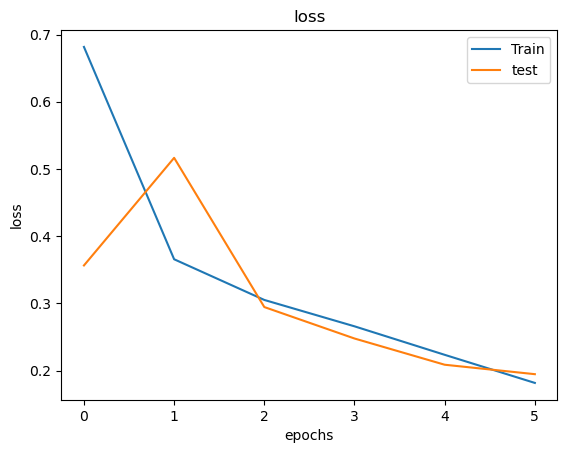

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','test'], loc='upper right')
plt.show()

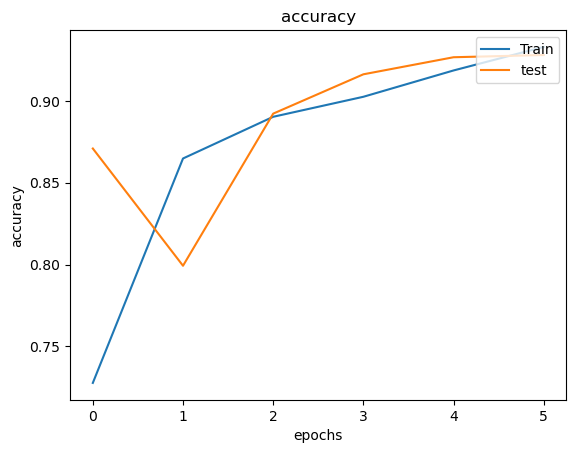

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','test'], loc='upper right')
plt.show()

In [13]:
#save model ke bentuk SavedModel
import pathlib

export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

#convert ke vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets
2022-12-03 06:05:19.594584: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-03 06:05:19.594631: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-03 06:05:19.599889: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: saved_model/
2022-12-03 06:05:19.607278: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-03 06:05:19.607335: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: saved_model/
2022-12-03 06:05:19.624628: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-03 06:05:20.050397: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


67262132